<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'],['scipy'])
await piplite.install(['seaborn'],['matplotlib'],['statsmodels'])

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-2806909461bb>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url, index_col = 0)

In [5]:
#boston_df.drop(columns=['Unnamed: 0'], inplace = True )

In [6]:
boston_df#.head(50)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Boxplot For Median value of owner-occupied homes

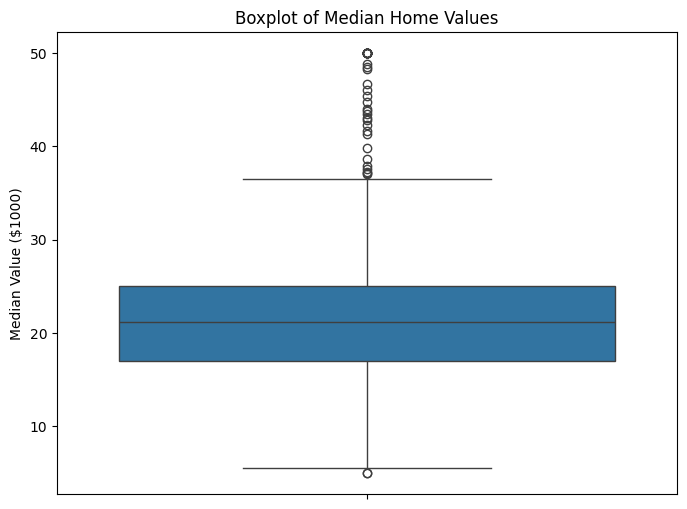

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(boston_df['MEDV'])
plt.title('Boxplot of Median Home Values')
plt.ylabel('Median Value ($1000)')
plt.show()

In [6]:
boston_df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

# Bar plot for the Charles river

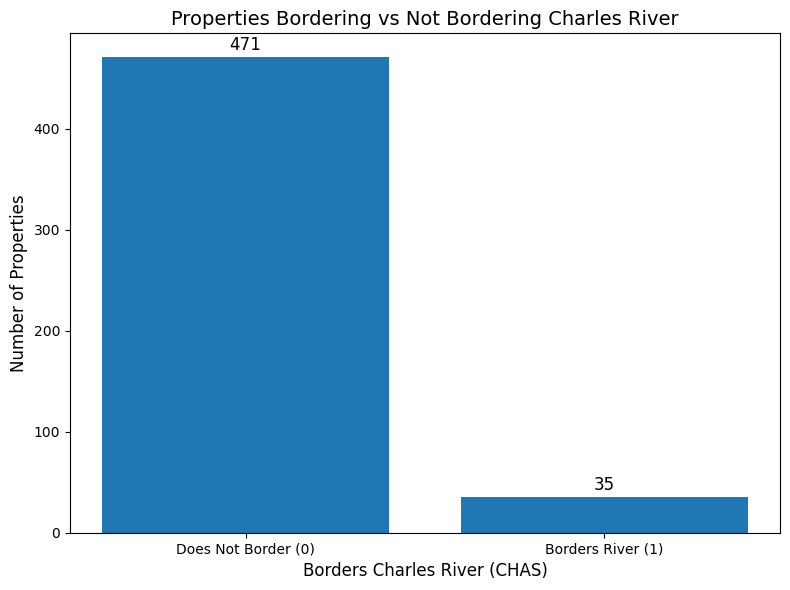

In [26]:
chas_counts = boston_df['CHAS'].value_counts()
plt.figure(figsize=(8,6))
bars=plt.bar(chas_counts.index,chas_counts.values)
plt.title('Properties Bordering vs Not Bordering Charles River', fontsize=14)
plt.xlabel('Borders Charles River (CHAS)', fontsize=12)
plt.ylabel('Number of Properties', fontsize=12)
plt.xticks([0, 1], ['Does Not Border (0)', 'Borders River (1)'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 3,
             f'{int(height)}', ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

# boxplot for the MEDV variable vs the AGE variable.

In [7]:
boston_df['age_group'] = pd.cut(boston_df['AGE'],
                               bins=[0,35,70,100],
                               labels=['35 years and younger',
                                       'between 35 & 70 years',
                                       '70 years and older'])
age_group_counts = boston_df.value_counts()

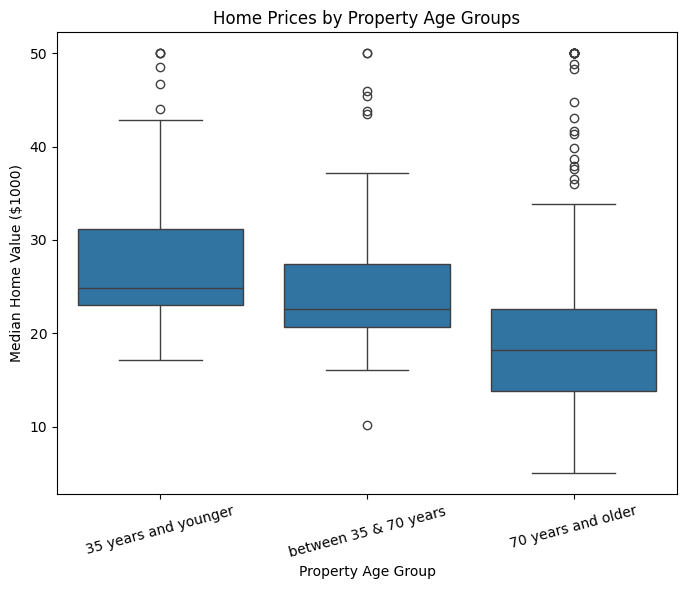

In [10]:
plt.figure(figsize=(8,6))
boxes = sns.boxplot(x='age_group',y='MEDV',data=boston_df)
plt.title('Home Prices by Property Age Groups')
plt.xlabel('Property Age Group')
plt.ylabel('Median Home Value ($1000)')
plt.xticks(rotation=15)
plt.show()

# scatter plot to show relationship between Nitric oxide & proportion of non-retail Business 

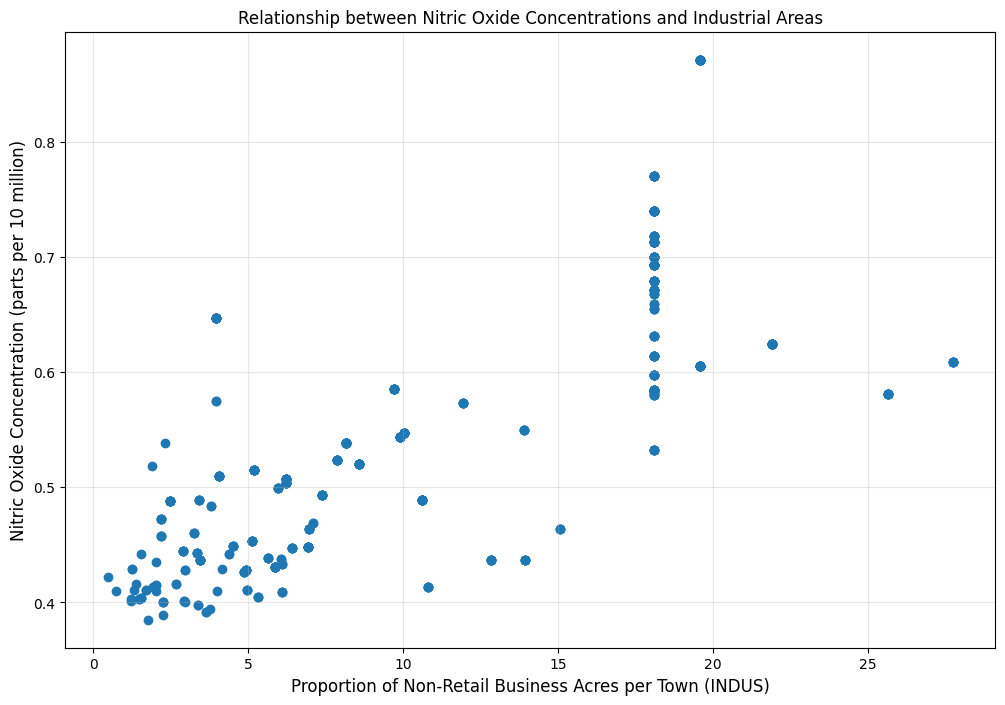

In [17]:
plt.figure(figsize=(12, 8))
plt.scatter(boston_df['INDUS'], boston_df['NOX'])
plt.title('Relationship between Nitric Oxide Concentrations and Industrial Areas')
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)', fontsize=12)
plt.ylabel('Nitric Oxide Concentration (parts per 10 million)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Histogram for the pupil to teacher ratio variable

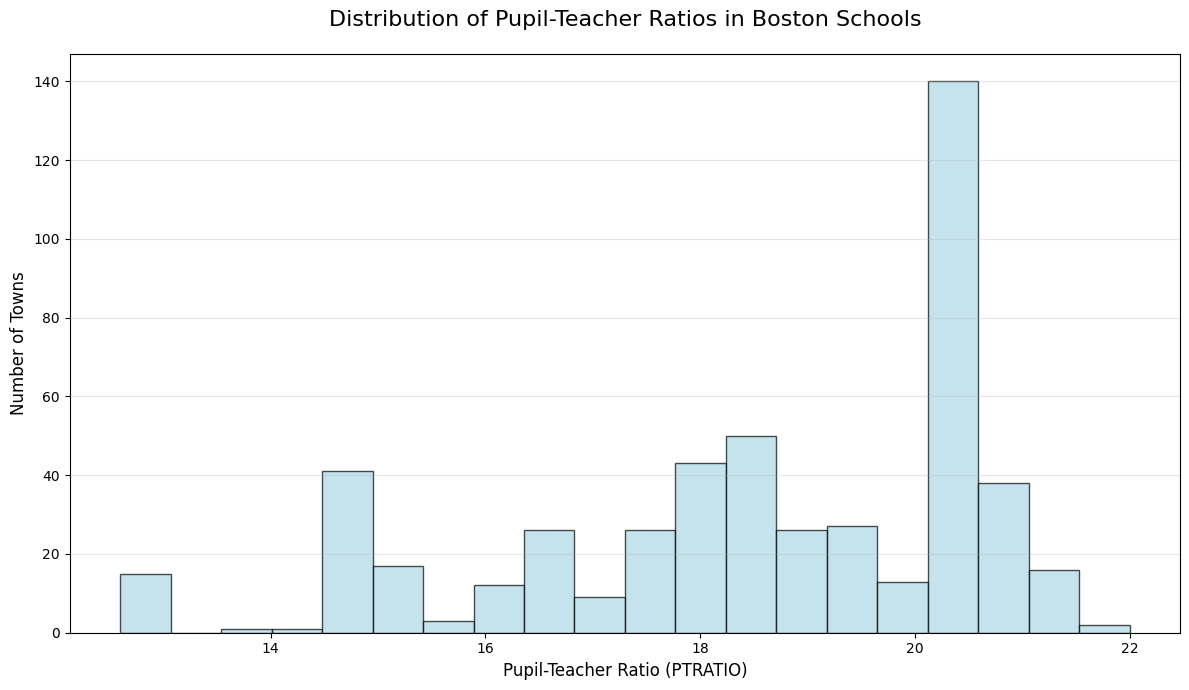

In [12]:
plt.figure(figsize=(12, 7))
plt.hist(boston_df['PTRATIO'], bins=20, color='lightblue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Pupil-Teacher Ratios in Boston Schools', fontsize=16, pad=20)
plt.xlabel('Pupil-Teacher Ratio (PTRATIO)', fontsize=12)
plt.ylabel('Number of Towns', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Task 3:

#### 1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#### Null Hypothesis:
There is no difference in median value of houses between bordered river and non-bordered river
#### Alternative Hypothesis:
There is a significant difference in median value of houses between bordered river and non-bordered river

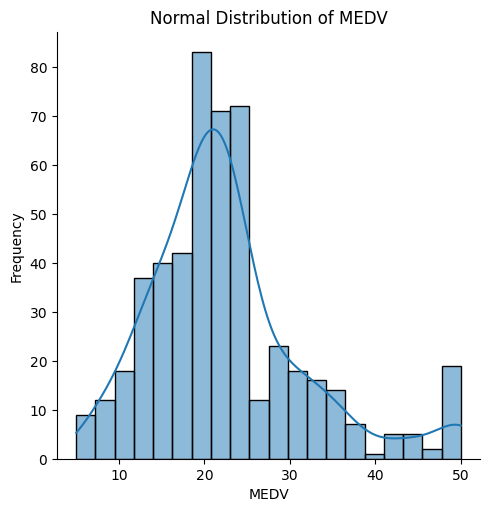

In [17]:
plot_ND = sns.displot(boston_df['MEDV'],
                     bins = 20,
                     kde = True
                     )
plot_ND.set(title='Normal Distribution of MEDV',ylabel='Frequency')

In [20]:
riverfront = boston_df[boston_df['CHAS'] == 1]['MEDV']
non_riverfront = boston_df[boston_df['CHAS'] == 0]['MEDV']
scipy.stats.levene(riverfront, non_riverfront)

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

###### pvalue < 0.05 so we reject null hypothesis

In [21]:
scipy.stats.ttest_ind(riverfront,non_riverfront,equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

##### pvalue < 0.05 so we reject null hypothesis (That is enough proof) 

#### 2:Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#### Null Hypothesis:
There is no significant difference in the median values of houses across different age groups of properties.
#### Alternative Hypothesis:
There is a significant difference in the median values of houses across different age groups of properties.

In [8]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], 
                         bins=[0, 33, 67, 100],
                         labels=['Low (0-33%)', 'Medium (34-67%)', 'High (68-100%)'])
Low = boston_df[boston_df['AGE_GROUP'] == 'Low (0-33%)']['MEDV']
Medium = boston_df[boston_df['AGE_GROUP'] == 'Medium (34-67%)']['MEDV']
High = boston_df[boston_df['AGE_GROUP'] == 'High (68-100%)']['MEDV']


In [9]:
scipy.stats.levene(Low,Medium,High)

LeveneResult(statistic=2.1586585597176686, pvalue=0.1165485678964594)

In [10]:
scipy.stats.f_oneway(Low,Medium,High)

F_onewayResult(statistic=34.7177641745332, pvalue=7.518189044025792e-15)

### 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

### Null Hypothesis (H₀):
There is no linear relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

ρ = 0

(where ρ is the population correlation coefficient)
### Alternative Hypothesis (H₁):
There is a linear relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

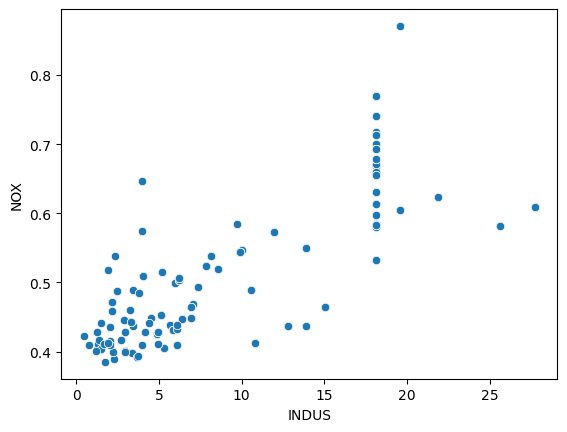

In [12]:
sns.scatterplot(x="INDUS", y="NOX", data=boston_df)

In [11]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

### 4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [13]:
X = boston_df['DIS']
Y = boston_df['MEDV']

X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        15:31:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0